In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [4]:
data = pd.read_csv("gender_submission.csv")

In [7]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [10]:
all = pd.concat([data_1, data_2], sort = False)

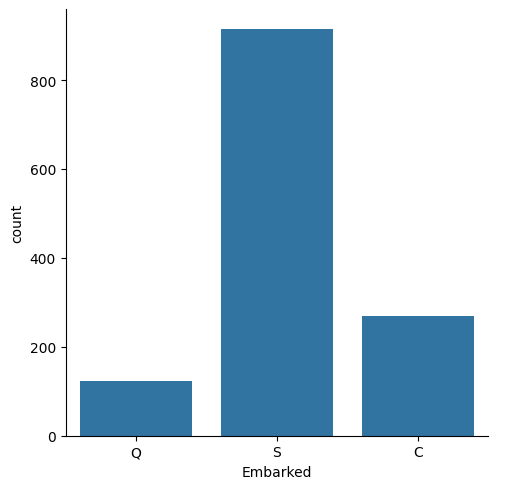

In [16]:
all = all.reset_index()
sns.catplot(x = 'Embarked', kind = 'count', data = all)

In [41]:
  all['Embarked'] = all['Embarked'].fillna('S')
  all['Age'] = all['Age'].fillna(value=all['Age'].median())
all['Fare'] = all['Fare'].fillna(value=all['Fare'].median())

In [42]:
all.loc[ all['Age'] <= 16, 'Age'] = 0
all.loc[(all['Age'] > 16) & (all['Age'] <= 32), 'Age'] = 1
all.loc[(all['Age'] > 32) & (all['Age'] <= 48), 'Age'] = 2
all.loc[(all['Age'] > 48) & (all['Age'] <= 64), 'Age'] = 3
all.loc[ all['Age'] > 64, 'Age'] = 4

In [43]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+\.)', name)

    if title_search:
        return title_search.group(1)
    return ""

In [44]:
all['Title'] = all['Name'].apply(get_title)
all['Title'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Ms.            2
Major.         2
Mlle.          2
Sir.           1
Countess.      1
Capt.          1
Don.           1
Lady.          1
Mme.           1
Dona.          1
Jonkheer.      1
Name: Title, dtype: int64

In [45]:
all['Title'] = all['Title'].replace(['Capt.', 'Dr.', 'Major.', 'Rev.'], 'Officer.')
all['Title'] = all['Title'].replace(['Lady.', 'Countess.', 'Don.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Royal.')
all['Title'] = all['Title'].replace(['Mlle.', 'Ms.'], 'Miss.')
all['Title'] = all['Title'].replace(['Mme.'], 'Mrs.')
all['Title'].value_counts()

Mr.         757
Miss.       264
Mrs.        198
Master.      61
Officer.     19
Royal.        6
Col.          4
Name: Title, dtype: int64

In [46]:
all['Cabin'] = all['Cabin'].fillna('Missing')
all['Cabin'] = all['Cabin'].str[0]
all['Cabin'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [47]:
all['Family_Size'] = all['SibSp'] + all['Parch'] + 1
all['IsAlone'] = 0
all.loc[all['Family_Size']==1, 'IsAlone'] = 1
all.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Family_Size,IsAlone
0,0,892,3,"Kelly, Mr. James",male,0.0,0,0,330911,7.8292,M,Q,NaN,Mr.,1,1
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,0.0,1,0,363272,7.0000,M,S,NaN,Mrs.,2,0
2,2,894,2,"Myles, Mr. Thomas Francis",male,0.0,0,0,240276,9.6875,M,Q,NaN,Mr.,1,1
3,3,895,3,"Wirz, Mr. Albert",male,0.0,0,0,315154,8.6625,M,S,NaN,Mr.,1,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,0.0,1,1,3101298,12.2875,M,S,NaN,Mrs.,3,0


In [48]:
all_1 = all.drop(['Name', 'Ticket'], axis = 1)

In [49]:
all_dummies = pd.get_dummies(all_1, drop_first = True)

In [50]:
all_train = all_dummies[all_dummies['Survived'].notna()]

In [51]:
all_test = all_dummies[all_dummies['Survived'].isna()]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_train.drop(['PassengerId','Survived'],axis=1),
                                                    all_train['Survived'], test_size=0.30,
                                                    random_state=101, stratify = all_train['Survived'])

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=0)

In [55]:
predictions = ada.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       165
         1.0       0.71      0.63      0.67       103

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268



In [57]:
print (f'Train Accuracy - : {ada.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {ada.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.761


In [58]:
TestForPred = all_test.drop(['PassengerId', 'Survived'], axis = 1)

In [59]:
t_pred = ada.predict(TestForPred).astype(int)

In [60]:
PassengerId = all_test['PassengerId']

In [61]:
adaSub = pd.DataFrame({'PassengerId': PassengerId, 'Survived':t_pred })

In [62]:
adaSub.to_csv("1_Ada_Submission.csv", index = False)